# 5 - Multidimensional Schrodinger equation and vibrational selection rules.<br>

## Intro

This homework is divided in five exercises:

1. In the first part we will review the functions of the 2D harmonic oscillator and time evolve a superposition of two eigenstates.

2. In the second part we will generate a gaussian wavepacket and time evolve it in a harmonic potential. Wavepacket propagation is an important technique employed in the description of different types of spectroscopy.

3. In the second part we will check the vibrational selection rules using the 1D harmonic oscillator.

4. and 5. In the last two parts we will explore an alternative method to solve the Schrodinger equation for the harmonic oscillator, called the ladder operator method.<br><br>


#### <i class="fa fa-smile-o"></i> Undergrads: The first three exercises are required and the last two are optional (bonus) points. <br>


#### Grad students: All the exercises are required. <br>


#### Instantaneous feedback :
We hope that by now you've had enough friendly exposure to iPython Notebook programming that you will be able to tackle this. Also, we've left as part of the notebook most of the figures that you should get as output if you write your code correctly, as a way to give instantaneous feedback to your code. <br><br>

### So, let's import the modules you'll need, and enjoy!!

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
#we'll use the next one for 3D plotting
import mpl_toolkits.mplot3d.axes3d as axes3d
from scipy.integrate import simps
#We'll use misc and hermval to generate the eigenfunctions of the H.O. 
from scipy import misc
from numpy.polynomial.hermite import hermval
import sys
sys.path.append('../library')
sys.path.append('../../library')
sys.path.append('/home/beangoben/chem160/library')
#This is how we'll import our own home-made modules
import quantumWorld as qworld
import pydoc

We will use the function harmonic_oscillator_2D which is now in your quantumWorld module to generate the eigenfunctions of the 2D harmonic oscillator (if you need to review this, look at the Demo # 7 HarmonicOscillator2D_FILLED.ipynb in your chem160_lib/demos_FILLED folder). <br><br>To recall how that function is called print out the documentation as shown below:

In [3]:
pydoc.doc(qworld.harmonic_oscillator_2D)

Python Library Documentation: function harmonic_oscillator_2D in module quantumWorld

harmonic_oscillator_2D(xx, yy, l, m, mass=1.0, omega=1.0, hbar=1.0)
    Returns the wavefunction for the 1D Harmonic Oscillator, given the following inputs:
    INPUTS:
        xx --> x-axis values for a 2D grid
        yy --> y-axis values for a 2D grid
        l --> l quantum number
        m --> m quantum number
        mass --> mass (defaults to atomic units)
        omega --> oscillator frequency, defaults to atomic units.
        hbar --> planck's constant divided by 2*pi


#### <i class="fa fa-medkit"></i> Help!
Remember you have the **help** function to ask for information on how a function is used:
```python
help(function)
```
#### <i class="fa fa-diamond"></i> Fancy plotting

The quantumWorld module also includes a function to make prettier plots via **fancy_plotting()**, with an optional argument **grid=False** which draws grids on the plot if desired.

## <i class="fa fa-check-circle-o"></i> Exercise 1: <br> Time evolve the wavefunctions of the 2D harmonic oscillator. <br>

First we are going to remember how the eigenstates of the 2D harmonic oscillator look like. With this purpose we will use a color map. First, generate a xx and a yy meshgrid, using np.meshgrid()

In [58]:
x = np.arange(-4,4,0.1)
y = np.arange(-4,4,0.1)
# use the meshgrid function from numpy to generate a grid here, assign the results to xx and yy variables
# (1 LINE)


Now, let's plot the first 9 eigenstates of the 2D Harmonic Oscillator.  We will create a list with the first 9 pairs of quantum numbers $l$ and $m$

In [59]:
l_m_list = [(0,0),(0,1),(1,0),(0,2),(2,0),(1,1),(1,2),(2,1),(2,2)]

such that by calling e.g. l_m_list[3][0] and l_m_list[3][1] we get the values of $l$ and $m$ of 0 and 2 respectively. For example:

In [60]:
print l_m_list[3][0], l_m_list[3][1]

0 2


### 1.a - Plot the first 9 eigenstates.

Now we'll set up a figure with 9 subplots (3 rows and 3 columns), and in each subplot we'll plot one eigenstate  as a colormap (The following boxes might take a while to compute, be patient).

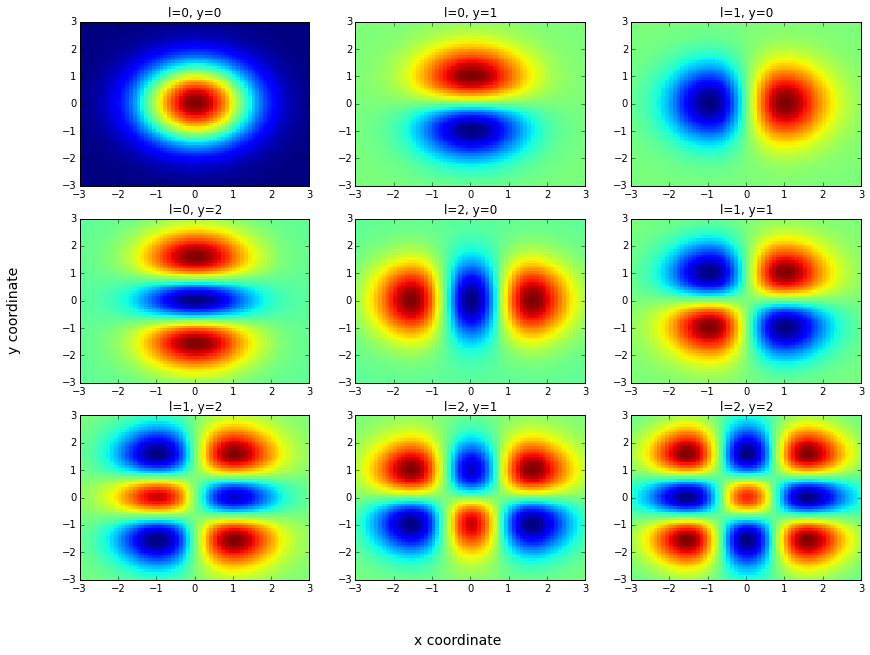

In [61]:
#Set up 3-row, 3-column figure (9 subplots) 
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(14, 10) #of whatever size we want. 

for i in range(len(axes.flat)): # this is one way to go over each subplot. 
    ax = axes.flat[i] #specify that we want to plot in the i-th subplot. 
    #############################################
    #get the i-th l and m numbers in l_m_list.  assign them to l and m, respectively. (2 LINES)

    
    ##############################################
    
    ##############################################
    #assign to the variable Psi_xy the (l,m) eigenfunction of the 2D HO. Use harmonic_oscillator_2D in 
    #your quantumWorld module. (1 LINE)

    ##############################################
    
    #Plot as a color map. 
    p = ax.pcolor(x, y, Psi_xy)
    ax.axis((-3,3,-3,3))
    ax.set_title('l='+str(l)+', y='+str(m))   
    
#And the code below is just to set a common x and y label to the set of 9 figures.     
fig.text(0.5, 0.04, 'x coordinate', ha='center', va='center', fontsize = 14)
fig.text(0.06, 0.5, 'y coordinate', ha='center', va='center', rotation='vertical', fontsize = 14)

### 1.b - Now generate an initial linear combination of two eigenstates.

As in homework 3, we will generate a superposition of two eigenstates (**l=0,m=0** and **l=1,m=1**), with equal contribution of each eigenstate.

In [62]:
#We will work in atomic units
hbar = 1
omega = 1

#The l and m values of our two eigenstates which we will linearly combine. 
#Quantum numbers for the first eigenfunction we'll use
l1=0
m1=0
#Quantum numbers for the second eigenfunction we'll use. 
l2=1
m2=1

#Set the initial coefficients for the superposition to the correct value (2 LINES)
c1_0 = 
c2_0 = 

#Let's call harmonic_oscillator_2D to get our two eigenstates, calling them 
#psi_xy_1 and psi_xy_2, respectively (2 LINES)



#Let's assing to E1 and E2 the energies of these two eigenstates. (2 LINES)



#Let's create the linear combination of the two eigenstates. (1 LINE)


### 1.c - Now generate a time array, and for each time step, get the time-evolved values of c1 and c2. We will generate an animation of the probability density function in time.

You did something similar in homework 3 with the 1D particle in a box. This is the same but for the 2D harmonic oscillator.

In [87]:
#import the animation module
from matplotlib import animation

# We will set the figure for you
fig, ax = plt.subplots()
t_array = np.arange(0,4,.05)

# ims is a list of lists, each row is a list of snapshots to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for t in t_array:

    #use the cn_t_function in quantumWorld to get the value of the cn coefficient at time = t. 
    #assign to variables c1_t and c2_t (2 LINES)

    
    ###################
    
    ##################
    #assign to variable psi_t the updated linear combination of the two eigenfunctions (1 LINE)

    ##################   
    
    # now we generate the animation
    im = plt.imshow(np.abs(psi_t)**2.0,extent=[-4,4,4,-4])
    an = ax.annotate('t='+str(t), xy=(0,0), xytext=(-3.5,3.5), fontsize=20, color='white')
    an.set_animated(True)
    ims.append([im,an])

anim = animation.ArtistAnimation(fig, ims, interval=1000, blit=True)

qworld.embedAnimation(anim,plt)

## <i class="fa fa-check-circle-o"></i> Exercise 2: <br>  Propagating a Gaussian wave packet in a 1D harmonic oscillator

A wavepacket is an envelope of localized wave action that travels as a unit. We can obtain a wavepacket by combining sinusoidals waves of different wavenumbers (As we have done to generate triangular or squared waves). Wavepacket dynamics (time propagation of wavepackets) is a very useful tool for understanding spectroscopy, and we will be exploring some of its applications in this course. 

A gaussian wavepacket has a gaussian envelope, that has the general form $exp(-\alpha (x-x_0)^2)$, where $x_0$ is the center of the wavepacket. In this section we will create an animation for the time-evolution of a Gaussian wave packet in a 1D harmonic oscillator potential. In order to time evolve the wavepacket, we will first need to decompose it in terms of the eigenstates of the 1D Harmonic oscillator. Remember that the coefficients in the decomposition will correspond to the overlap integrals between the the wavepacket, $\psi(x)$, and the eigenstates of the 1D Harmonic Oscillator, $\psi_n(x)$:
$t=0$: $$ c_n(t=0) = \int \psi_n(x)\;\psi(x,t=0)\;dx$$ 

### 2.a - First, create and plot an initial Gaussian Wave Packet

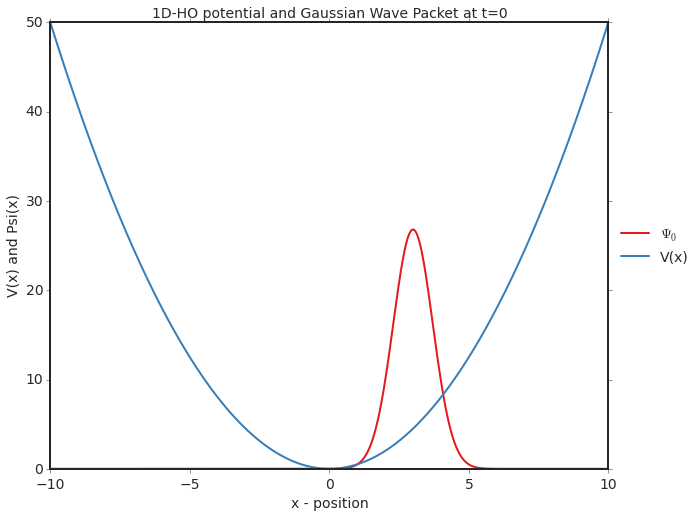

In [95]:
#First create an array of positions, x, which goes from -10 to 10 in intervals of 0.01
x = np.arange(-10,10, 0.01)
#We'll shift the gaussian wave packet by x0 to the right of the potential
x0 = 3
#Let's assign to Vx the harmonic oscillator potential, using quantumWorld.harmonic_oscillator_v (1 LINE)

#Now, we'll assign to psi_0 a simple Gaussian wave packet center in x0.

#And normalize it using normalize_wf inside your quantumWorld module, assign it to psi_0 (1 LINE)

#And now let's plot the gaussian wave packet, at t=0, overlayed with the potential. (1 LINE)

#we'll use a scaling factor just for visualization purposes. 
scaling_factor = 30
qworld.fancy_plotting()
qworld.my_plotting_function(x, [scaling_factor*psi_0, Vx], ['$\Psi_0$','V(x)'], title='1D-HO potential and Gaussian Wave Packet at t=0', xlab='x - position', ylab='V(x) and Psi(x)',fts=14)

### 2.b - Now, let's get the $c_n$ coefficients at time t=0 by computing the overlap integrals $$ \int \psi_n(x)\;\psi(x,t=0)\;dx$$  where $\psi(x,t=0)$ is the initial Gaussian wave packet.

If you are lost as to what we are doing, you might want to review Demo 2 (Wave Decomposition) as well problem set 2, where we approximated the triangle and square functions as sums of sine functions. 

In [96]:
#How many eigenfunctions do we want to project agains?
nmax = 10

#Initialize an array of zeros, called psi_0_approx, which is the same length as psi_0 (1 LINE)

#Initialize an array of zeros, which is of length nmax, call it c_n_0_array

#Start a for-loop that loops over each value from n = 0 to n = nmax
for n in range(nmax):
    #For each value of n, get the nth eigenfunction of the 1D HO using harmonic_oscillator_wf in 
    #your quantumWorld library. assign it to the variable psi_n (1 LINE)

    #Assign to the variable integrand the integrand of the overlap integral (1 LINE)

    #integrate the integrand using simps to get the c_n_0 coefficient (the variable name we'll)
    #use for the c_n coefficient at time = 0. (1 LINE)

    #update psi_0_approx by adding the new term of the sum, c_n_0*psi_n (1 LINE)

    #add c_n_0 the the nth position of the c_n_0_array (1 LINE)



Now we'll overlay in the same plot, the gaussian as well as the sum of eigenstates of the HO that we just built that should approximate the gaussian.  Do they look similar?

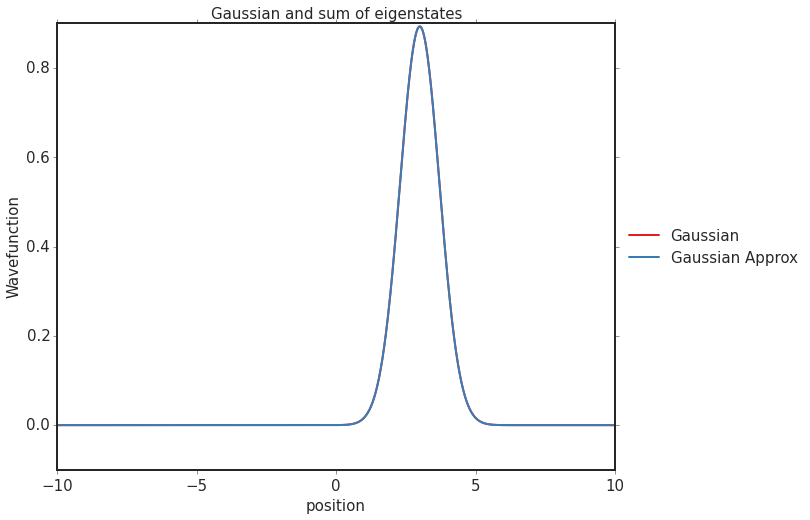

In [99]:
qworld.my_plotting_function(x, [psi_0, psi_0_approx], ['Gaussian', 'Gaussian Approx'], 'Gaussian and sum of eigenstates', 'position', 'Wavefunction',fts=15)


### 2.c - To quantify how similar the approximation is to the actual Gaussian, we'll compute the overlap between the two, $$overlap=\int \psi(x,t=0)\;\psi_{approx}(x,t=0)\;dx\;$$

and call the error $1 - overlap$. See what the error is, and modify $nmax$ in the two cells above until the error is less than $10^{-10}$ <br>(HINT: you don't need more than 40 eigenfunctions to make the error small enough. )

In [100]:
#assign to the variable overlap the integral mentioned above. use simps to integrate. 
overlap = simps(np.conjugate(psi_0)*psi_0_approx,x)
error = 1 - overlap
print 'the error is ' + str(error) + ' when I use ' + str(nmax) + ' HO eigenstates to approximate the Gaussian '

the error is 1.9251267247e-13 when I use 30 HO eigenstates to approximate the Gaussian 


### 2.d - Now comes the fun stuff.  We'll generate an animation that shows how the Gaussian wave packet evolves with time. 

In [103]:
#import the animation module
from matplotlib import animation

#We'll set up the figure for you
fig = plt.figure()
ax = plt.axes(xlim=(-8, 8), ylim=(-1, 1)) #create single axis in figure
plt.xlabel('NONE')
plt.ylabel('NONE')
line, = ax.plot([], [], lw=2) #line is a plot.... 

#This init function will be called to create 
#the base frame upon which the animation takes place.
#we'll set it up for you as well
def init():
    line.set_data([], []) #sets the line data to nothing
    return line,  #return the line object

### COMPLETE THIS ANIMATION FUNCTION, WHICH WILL BE CALLED 
### ITERATIVELY FOR MANY VALUES OF T
def animate(t): 
    #Add a time scaling factor, to make the animation slower
    time_scaling = 0.3
    t = time_scaling*t
    #####################################
    #set to psi_t an array of zeros, same length as psi_0 (1 LINE)

    ########################################
    
    ###############################
    #start a for-loop that let's you grab each coefficient in c_n_0_array
    for n in range(len(c_n_0_array)):
        ############################
        #assign to c_n_0 the nth element in c_n_0_array (1 LINE)

        ####################################
        ######################################
        #Assign to En the energy of the nth eigenfunction of the 1D HO. (1 LINE)

        ####################################
        #################################
        #use cn_t_function in quantumWorld library to get c_n_t, the value of the nth coefficient
        #at time t (1 LINE)

        ############################################
        #########################################
        #assign to psi_n the nth eigenfunction of the 1D HO (1 LINE)

        ###############################
        ##########################################
        #update psi_t by adding c_n_t*psi_n (1 LINE)

        
    #plot the pdf associated to psi_t
    pdf = np.conjugate(psi_t)*psi_t
    line.set_data(x, pdf)  #This is what you plot at each frame in the animation. 
    return line,

#Let's create the animation!!!
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200)
#save the animation
qworld.embedAnimation(anim,plt)

#### <i class="fa fa-question-circle"></i> Question: How do you interpret the dynamics of the wavepacket from a classical perspective? Think about how the dynamics relates to the form of the potential.

##### Answer here

## <i class="fa fa-check-circle-o"></i> Exercise 3: <br> The vibrational selection rules

** In this section, we'll take the expectation value of the dipole operator for different eigenstates of the Harmonic Oscillator, and we'll discover the vibrational selection rules.**

In essence we want to evaluate the **transition moment integral**: $$ \int \psi_m^* \; \hat{\mu} \; \psi_n \;dx$$ where $\psi_n$ and $\psi_m$ are the two states involved in the transition, and   $\hat{\mu}$ is the dipole operator.<br> In general, the allowed transitions can be determined by symmetry considerations (e.g. integrals of **odd functions** are zero when integrated over all space), but in this exercise we will do it numerically. <br> <br> We will consider the case where $\hat{\mu} = x$, i.e. the case where the transition moment operator is the **electric dipole operator**. 

### 3.a - Define a function transition_moment_integrand which takes as input x, and two quantum numbers n1, n2, and return the integrand $\psi_m^* \; \hat{\mu} \; \psi_n$ where $\psi_n$ is the nth eigenstate of the 1D Harmonic Oscillator

In [104]:
def transition_moment_integrand(x,n1,n2):
    '''this function returns the transition moment integrand
    '''
    # (3 LINES)
    
    
    
    return integrand

Before we calculate the integral we will try to predict the pairs of quantum numbers $n$ and $m$ for which the integral $ \int \psi_m^* \; \hat{\mu} \; \psi_n \;dx$ will dissapear. 

### 3.b Plot the integrand $\psi_n^* \; \hat{\mu} \; \psi_n  = \psi_n^* \; x \; \psi_n $ (i.e. for the case $n=m$ ) for $n=0$ to $n=8$

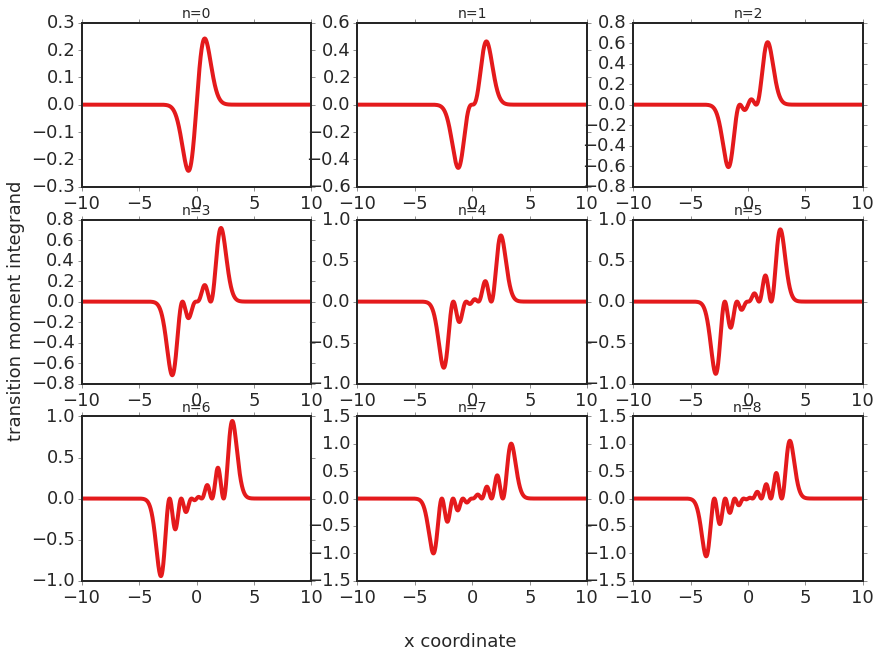

In [105]:
#Set up 3-row, 3-column figure (9 subplots) 
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(14, 10) #of whatever size we want. 

#For each sublot. 
for i in range(len(axes.flat)): # this is one way to go over each subplot. 
    ax = axes.flat[i]
    n=i #We'll plot n=0 in the first subplot, n=1 in the second, etc. 
    ###############################################
    #Assign to the variable integrand the integrand of the transition moment integral
    # using the function we defined above. (1 LINE)

    #####################################################
    
    #plot the integrand. 
    ax.plot(x, integrand, linewidth = 4)
    ax.set_title('n='+str(n),fontsize=14)

#And the code below is just to set a common x and y label to the set of 9 figures.     
fig.text(0.5, 0.04, 'x coordinate', ha='center', va='center', fontsize = 18)
fig.text(0.06, 0.5, 'transition moment integrand', ha='center', va='center', rotation='vertical', fontsize = 18)

#### <i class="fa fa-question-circle"></i> Question: Look at the integrals above. Do they look even or odd to you. (Review the definition of odd and even functions by e.g. looking it up in Wikipedia).  Do you think the integrals will be zero or not?

##### Answer here.

### 3.c - What about for the case where $n = m+1$? Copy the code above and modify it to generate plots of the integrand $\psi_n^* \; \hat{\mu} \; \psi_{n+1}  = \psi_n^* \; x \; \psi_{n+1} $  for $n=0$ to $n=8$

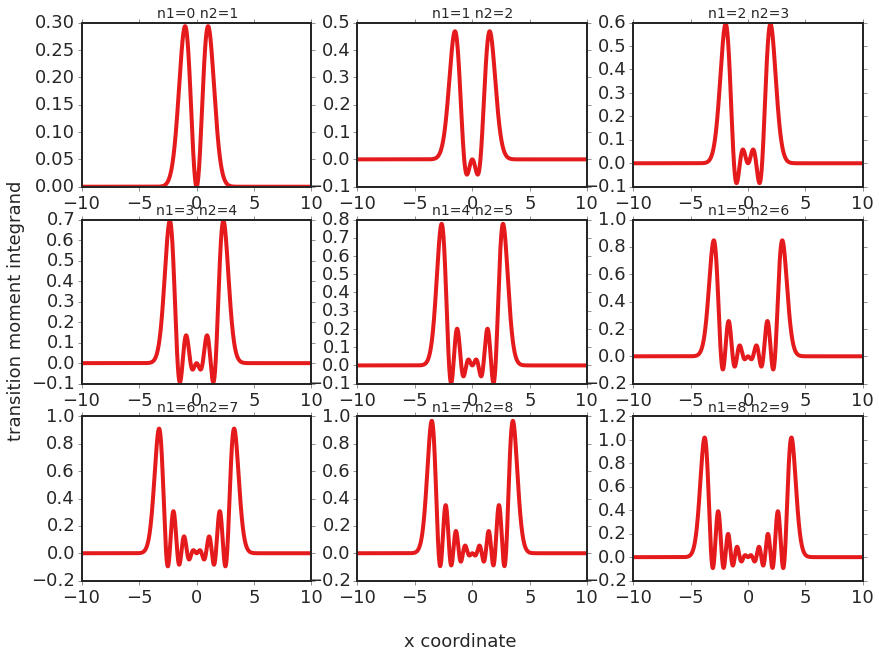

#### <i class="fa fa-question-circle"></i> Question: Look at the integrals above. Do they look even or odd to you.  Do you think the integrals will be zero or not?

##### Answer here.

### 3.c - Finally, evaluate the transition moment integral for all possible pairs of eigenfunctions in the range $n = 0$ to $n=10$.  

We'll store the value of each integral in a matrix, and display the matrix using the matshow function. To do this, you will need to write a nested for loop (a for loop inside another for loop) in order to evaluate the transition moment integral for all pairs of quantum numbers in the range $n =0$ to $n=9$

In [107]:
#This is our array of positions.
x = np.arange(-10, 10, 0.01)

######################################
#Create a matrix of zeros that has dimensions 10 by 10. 
#Call it trans_moment
trans_moment = np.zeros((10,10))

################################################
#Create a nested for loop that goes over each value n1 = 0....9 and n2 = 0...9 (2 LINES)


        ####################################
        #And for each pair of values, it evaluates the transition moment integrand (1 LINE)

        #And assigns it to the n1,n2 element of the trans_moment matrix (1 LINE)
        

Now we will generate the plot of the matrix of transition moments using the matshow function:

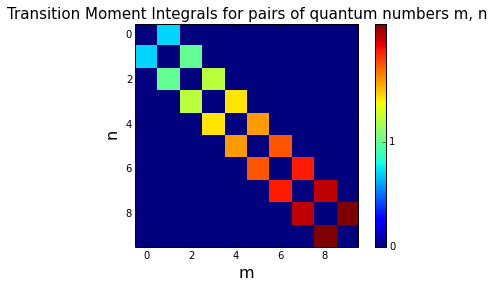

In [86]:
fig, ax = plt.subplots()
cax = ax.imshow(np.abs(trans_moment), interpolation='nearest')

#plt.imshow(np.abs(trans_moment))
ax.set_xlabel('m', fontsize = 16)
ax.set_ylabel('n', fontsize = 16)
ax.set_title('Transition Moment Integrals for pairs of quantum numbers m, n', fontsize = 15)

cbar = fig.colorbar(cax, ticks=[-1, 0, 1])



#### <i class="fa fa-question-circle"></i> Question: Based on the results above, formulate the vibrational selection rule. Which transitions are allowed?

##### Answer here

## <i class="fa fa-check-circle-o"></i> Exercise 4:  Ladder Operators method for the quantum harmonic oscillator.<br>

### <i class="fa fa-exclamation-triangle"></i> Grad students, one point, required
### <i class="fa fa-smile-o"></i> Undergrad students, one point, optional <br>

### <i class="fa fa-pencil"></i> You can write your answers here with [markdown + latex](https://guides.github.com/features/mastering-markdown/) or turn them in paper. Show your work.

Paul Dirac developed an elegant method to extract the eigenvalues of the harmonic oscillator without directly solving the differential equation, known as the ladder operator approach. In this method we start by defining the raising and lowering operators, $\hat{a}^\dagger$ and $\hat{a}$ as:

$$ \hat{a}^{\dagger}=\sqrt{\frac{m\omega}{2\hbar}} \left( \hat{x} - \frac{i}{m\omega}\hat{p}\right) \quad \hat{a}=\sqrt{\frac{m\omega}{2\hbar}} \left( \hat{x} + \frac{i}{m\omega}\hat{p}\right) \quad Eq. 1$$

where $\hat{x}$ and $\hat{p}$ represent the position and momentum operators, respectively, and $m$ and $\omega$ the mass and fundamental frequency of the oscillator. The harmonic oscillator wavefunctions are represented as $|n\rangle$, where n is the quantum number of the eigenfunction. This representation is called the number basis. For instance, the ground state will correspond to the state $|n=0\rangle$ (or simply $|0\rangle$) and the first excited state will correspond to $|1\rangle$.

The raising and lowering operators receive these names because of their action on the wavefunctions:

$$ \hat{a}^{\dagger} |n\rangle = \sqrt{n+1} \ |n+1\rangle \quad \hat{a} |n\rangle = \sqrt{n} \ |n-1\rangle \quad Eq. 2$$

We will see how we can find the eigenvalues of the harmonic oscillator using the ladder operators proposed by Dirac.

### 4. A - Consider the ground state and first excited wavefunctions of the harmonic oscillator in the position representation: <br>

#### $$\psi_0=\left( \frac{\alpha}{\pi} \right)^ {1/4} \exp(\frac{-\alpha x^2}{2})$$ and $$\psi_1=\left( \frac{4\alpha^3}{\pi} \right)^ {1/4} x\exp(\frac{-\alpha x^2}{2})$$

#### where $\alpha=\frac{m\omega}{\hbar}$. Using the definitions of Eq. 1 show that:

#### i) $\hat{a} |0\rangle =0$ 
#### ii) $\hat{a} |1\rangle = |0\rangle$ 
#### iii) $\hat{a}^{\dagger} |0\rangle = |1\rangle$ 

### 4. B - Using Eq. 2, show that $\hat{a}^{\dagger} \hat{a}$ is the number operator, such as: $\hat{a}^{\dagger} \hat{a} \ |n\rangle = n \ |n\rangle$

### 4. C - Using Eq. 2, show that the commutator $[\hat{a}^{\dagger},\hat{a}]$ is equal to 1.

### 4. D - Using Eq. 1, show that the Hamiltonian of the system, $\hat{H}=\frac{\hat{p}^2}{2m} + \frac{m\omega \hat{x}^2}{2}$ can be written as: $(\hat{a}^{\dagger} \hat{a} + 1/2) \hbar \omega$ (Hint: use the canonical commutation relation $[\hat{x},\hat{p}]=i\hbar$)

### 4. E - Apply the hamiltonian $(\hat{a}^{\dagger} \hat{a} + 1/2) \hbar \omega$ to the n-th eigenstate, $|n\rangle$. What do you get? Can you see why the ladder operator is so nice?

## <i class="fa fa-check-circle-o"></i> Exercise 5:  Matrix form of operators in the ladder operator representation.<br>

### <i class="fa fa-exclamation-triangle"></i> Grad students, one point, required
### <i class="fa fa-smile-o"></i> Undergrad students, one point, optional <br>

### <i class="fa fa-pencil"></i> You can write your answers here with [markdown + latex](https://guides.github.com/features/mastering-markdown/) or turn them in paper. Show your work.

We have learned in class that we can expand our wavefunction in terms of a finite **orthonormal** basis (formally infinite, but finite for numerical purposes):
$$\psi=\sum^{N}_{i=0} c_i |b_i\rangle \quad  Eq. 3$$
where $|b_i\rangle$ represent the i-th basis function and $c_i$ the corresponding scalar coefficient. Within a basis, the matrix representation of an operator, $\hat{O}$, is given by:

$${\bf{O}}=\begin{bmatrix}
\langle b_0 | \hat{O} | b_0 \rangle & \langle b_0 | \hat{O} | b_1 \rangle & \dots & \langle b_0 | \hat{O} | b_N \rangle \\
\langle b_1 | \hat{O} | b_0 \rangle & \langle b_1 | \hat{O} | b_1 \rangle & \dots & \langle b_1 | \hat{O} | b_N \rangle \\
\vdots & \vdots & \ddots & \vdots \\
\langle b_N | \hat{O} | b_0 \rangle & \langle b_N | \hat{O} | b_1 \rangle & \dots & \langle b_N | \hat{O} | b_N \rangle \\
\end{bmatrix} \quad Eq. 4$$ 

where $\langle b_i | \hat{O} | b_j \rangle$ is the (i,j) matrix element, corresponding to the integral of the product between the operator $\hat{O}$ applied to $|b_j\rangle$ and the conjugate of $|b_i\rangle$, evaluated over the corresponding domain. 

Now consider the number basis for the harmonic oscillator, $|n\rangle$, that is orthonormal. We are going to obtain the matrix representation of the operators $\hat{x}$, $\hat{p}$ and $\hat{H}$ in this basis.

### 5. A - By manipulating Eq. 1, express the operators $\hat{x}$ and $\hat{p}$ as functions of $\hat{a}^{\dagger}$ and  $\hat{a}$.

### 5. B - Write down the matrix representation of the operator $\hat{x}$ in the number basis for N=5 (Hint: Follow the prescription of Eq. 4 and use the properties defined in Eq. 2).

### 5. C - Write down the matrix representation of the operator $\hat{p}$ in the number basis for N=5 (Hint: Follow the prescription of Eq. 4 and use the properties defined in Eq. 2).

### 5. D - Write down the matrix representation of the Hamiltonian operator $\hat{H}$ in the number basis for N=5 (Hint: you already have $\hat{H}$ in terms of $\hat{a}^{\dagger}$ and  $\hat{a}$ from 4-D). What is special about the Hamiltonian matrix?

### 5. E - We can write the Schrodinger equation in matrix form as: $${\bf Hc_i}=E_i{\bf c_i}$$ where $\bf H$ is the matrix representation of the Hamiltonian and $\bf c_i$ is the i-th eigenvector. Write down the eigenvectors of the Hamiltonian matrix for the harmonic oscillator in the number basis for $N=5$. 